First 5 rows:
                  Date      Time     Booking_ID        Booking_Status  \
0 2024-07-26 14:00:00  14:00:00  CNR7153255142    Canceled by Driver   
1 2024-07-25 22:20:00  22:20:00  CNR2940424040               Success   
2 2024-07-30 19:59:00  19:59:00  CNR2982357879               Success   
3 2024-07-22 03:15:00  03:15:00  CNR2395710036  Canceled by Customer   
4 2024-07-02 09:02:00  09:02:00  CNR1797421769               Success   

  Customer_ID Vehicle_Type Pickup_Location Drop_Location  V_TAT  C_TAT  \
0   CID713523  Prime Sedan     Tumkur Road      RT Nagar    NaN    NaN   
1   CID225428         Bike     Magadi Road       Varthur  203.0   30.0   
2   CID270156    Prime SUV   Sahakar Nagar       Varthur  238.0  130.0   
3   CID581320        eBike      HSR Layout   Vijayanagar    NaN    NaN   
4   CID939555         Mini     Rajajinagar   Chamarajpet  252.0   80.0   

                     Canceled_Rides_by_Customer      Canceled_Rides_by_Driver  \
0                         

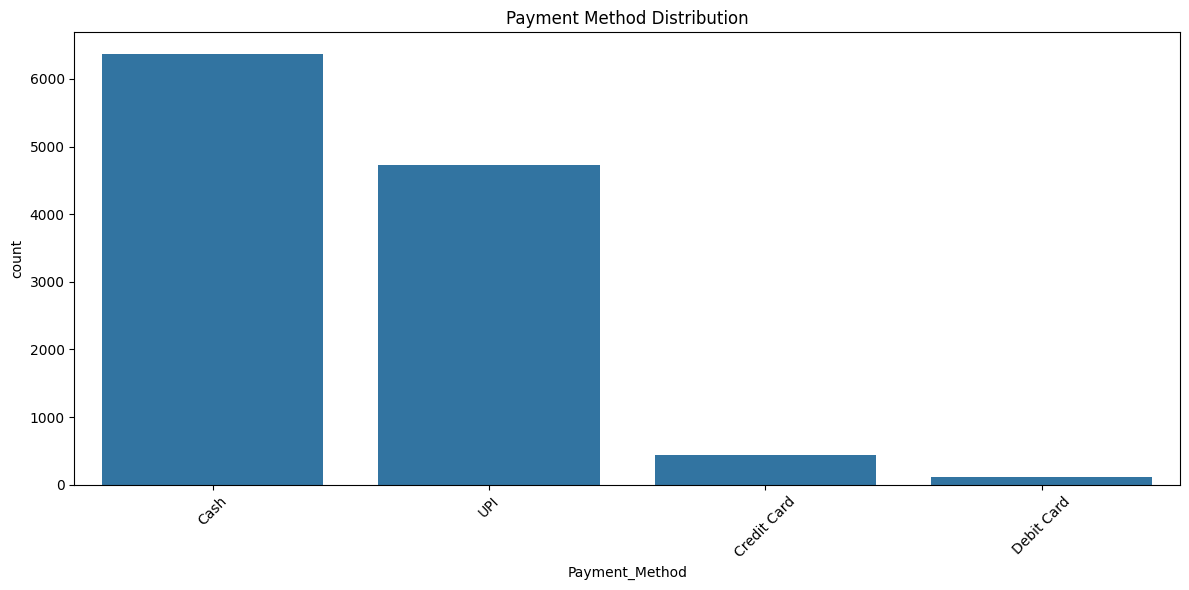

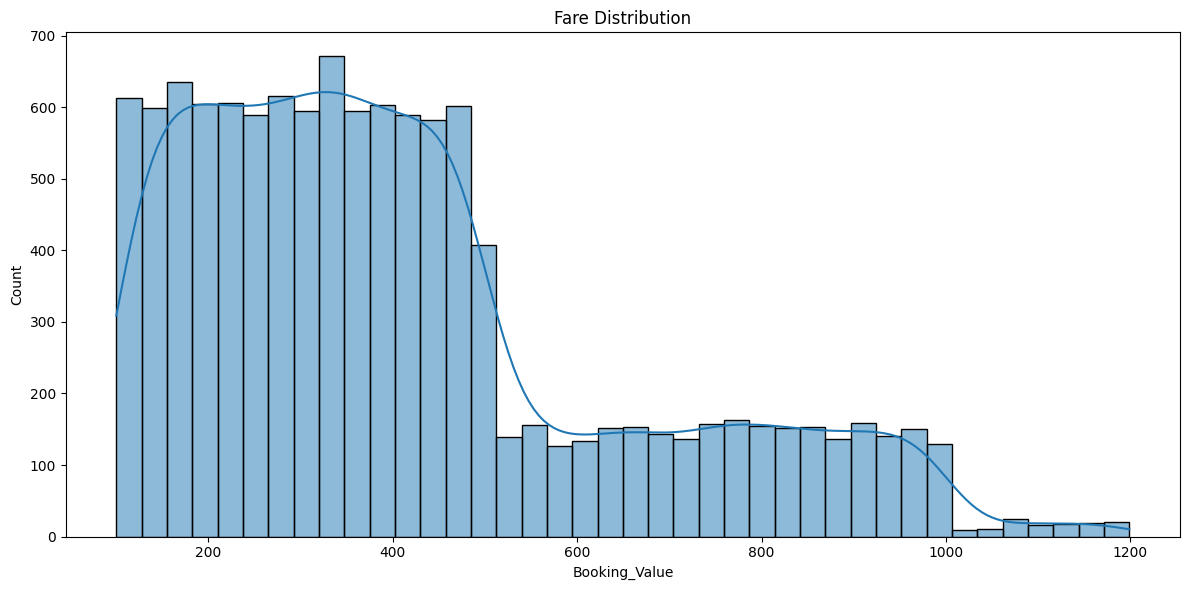

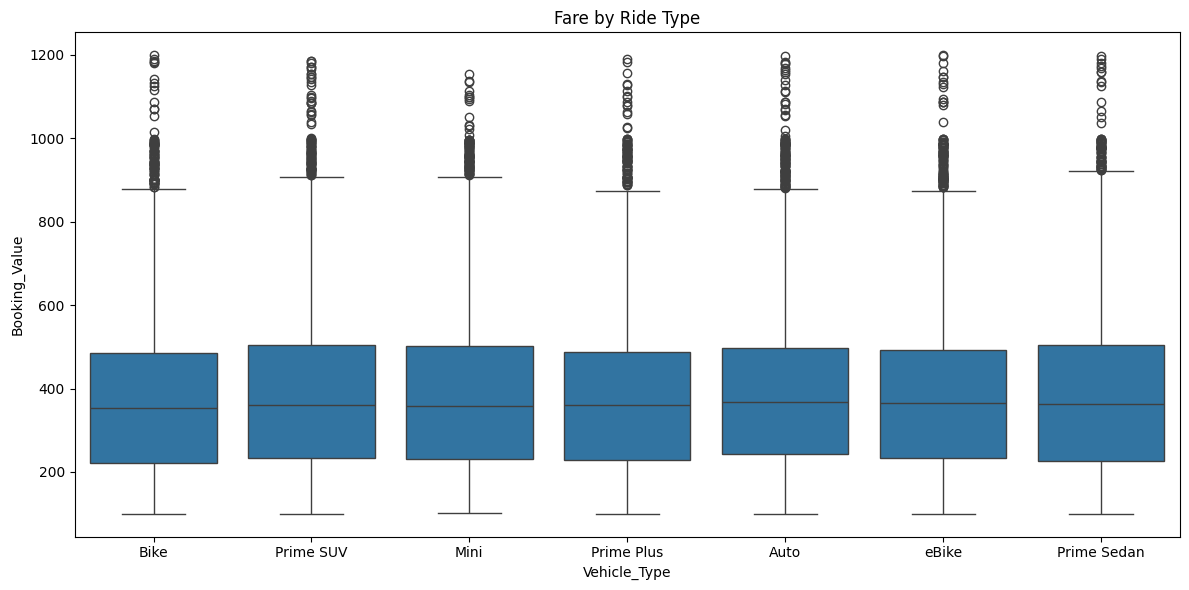

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_excel("data/Bookings-20000-Rows.xlsx")

# 2. View first few rows
print("First 5 rows:\n", df.head())

# 3. Data types and null info
print("\nData info:")
df.info()

# 4. Summary statistics
print("\nSummary statistics:\n", df.describe())

# 5. Handling missing values (Cleaning)
print("\nMissing values before cleaning:\n", df.isnull().sum())
df['Payment_Method'] = df['Payment_Method'].fillna("Unknown")
df['Driver_Ratings'] = df['Driver_Ratings'].fillna(df['Driver_Ratings'].mean())
df['Customer_Rating'] = df['Customer_Rating'].fillna(df['Customer_Rating'].mean())

# 6. Drop mostly useless/NaN columns (Feature selection)
columns_to_drop = ['Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
                   'Incomplete_Rides_Reason', 'Vehicle Images']
df = df.drop(columns=columns_to_drop)
print(df.columns.tolist())

# 7. Ensure data integrity and consistency
# Remove negative fares and durations
df = df[(df['Booking_Value'] > 0) & (df['V_TAT'] > 0)]   

# Convert 'Trip_Date' to datetime format (if exists)
if 'Trip_Date' in df.columns:
    df['Trip_Date'] = pd.to_datetime(df['Trip_Date'], errors='coerce')

# 8. Check again for missing values
print("\nMissing values after cleaning:\n", df.isnull().sum())

# 9. Identify patterns, trends, anomalies
print("\nTop 5 most common pickup locations:\n", df['Pickup_Location'].value_counts().head())
print("\nMost popular payment method:\n", df['Payment_Method'].value_counts().idxmax())

# Group by payment method and calculate average fare
print("\nAverage fare by payment method:\n", df.groupby('Payment_Method')['Booking_Value'].mean())

# 10. Handle outliers in Fare using IQR
Q1 = df['Booking_Value'].quantile(0.25)
Q3 = df['Booking_Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Booking_Value'] >= lower_bound) & (df['Booking_Value'] <= upper_bound)]

# 11. Initial visual representation
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Method', data=df)
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Booking_Value'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle_Type', y='Booking_Value', data=df)
plt.title("Fare by Ride Type")
plt.tight_layout()
plt.show()
